In [3079]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

#plt.style.use(['science', 'notebook'])
#%matplotlib inline


In [3080]:
data_file = "conso.txt"

In [3081]:
def read_text(filename):
    f = open(filename, "r")
    text = f.readlines()
    f.close()
    print(text)

#read_text(data_file)
def get_data(filename):    
    data = pd.read_csv(filename)
    #data['time'] = pd.to_datetime(data['time'])  #.dt.tz_convert(None)
    #data.info()
    #print(data.tail(5))
    return data


In [3082]:
# read data with pandas
data = get_data(data_file)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Conso   1013 non-null   float64
dtypes: float64(1)
memory usage: 8.0 KB


In [3083]:
data['interval']=3600/data['Conso']
data

,Conso,interval
0,0.19,18947.368421
1,0.19,18947.368421
2,0.19,18947.368421
3,0.19,18947.368421
4,0.19,18947.368421
...,...,...
1008,0.16,22500.000000
1009,0.16,22500.000000
1010,0.17,21176.470588
1011,0.17,21176.470588


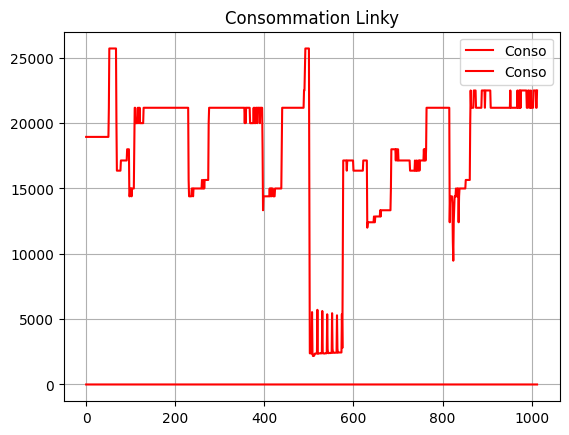

In [3084]:

plt.title('Consommation Linky')
plt.plot(data, color='red',label='Conso')

plt.grid()
plt.legend()

### conso.csv sur WD6TB mis à jour avec PI4

In [3085]:
def get_data2(filename):    
    data = pd.read_csv(filename, names=["Interval","kWh"])
    return data

In [3086]:
old = False

if old:
    #conso_file = r"C:\Users\jean\Documents\conso.csv"
    conso_file = r"Y:\Documents\conso_old.csv"
    conso_file = r"Y:\Documents\conso - Copy (2).csv"
else:
    conso_file = r"Y:\Documents\conso.csv"
#old = False
conso_data = get_data2(conso_file)
conso_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49671 entries, 0 to 49670
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Interval  49671 non-null  int64  
 1   kWh       49671 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 776.2 KB


In [3087]:
conso_data = conso_data.dropna()
conso_data

,Interval,kWh
0,26289,0.14
1,26243,0.14
2,25885,0.14
3,25754,0.14
4,25774,0.14
...,...,...
49666,24527,0.15
49667,24456,0.15
49668,25365,0.14
49669,24789,0.14


In [3088]:
conso_data['sec']=conso_data['Interval']/1000
conso_data['Wh']=3600000/conso_data['Interval']
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

conso_data

,Interval,kWh,sec,Wh,cumul(ms)
0,26289,0.14,26.289,136.939404,26289
1,26243,0.14,26.243,137.179438,52532
2,25885,0.14,25.885,139.076685,78417
3,25754,0.14,25.754,139.784111,104171
4,25774,0.14,25.774,139.675642,129945
...,...,...,...,...,...
49666,24527,0.15,24.527,146.777021,1186666551
49667,24456,0.15,24.456,147.203140,1186691007
49668,25365,0.14,25.365,141.927853,1186716372
49669,24789,0.14,24.789,145.225705,1186741161


In [3089]:
# index dernier echantillon
l=len(conso_data)-1
l

49670

In [3090]:
# cumtime = int(conso_data['cumul(ms)'].tail(1).values[0]*1000)
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)
cumtime

1186766166000

In [3091]:
old

False

In [3092]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début


datetime.datetime(2024, 3, 7, 0, 24, 37, 705425)

In [3093]:

if old:
    base = dt.datetime(2023, 8, 1, 10, 45, 0) - timedelta(microseconds=cumtime)


conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]
conso_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49671 entries, 0 to 49670
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   49671 non-null  int64         
 1   kWh        49671 non-null  float64       
 2   sec        49671 non-null  float64       
 3   Wh         49671 non-null  float64       
 4   cumul(ms)  49671 non-null  int64         
 5   dates      49671 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 2.3 MB


In [3094]:
conso_data['days']= [d.strftime('%d/%m/%Y') for d in conso_data['dates']]    #[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 00:25:03.994425,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 00:25:30.237425,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 00:25:56.122425,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 00:26:21.876425,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 00:26:47.650425,07/03/2024
...,...,...,...,...,...,...,...
49666,24527,0.15,24.527,146.777021,1186666551,2024-03-20 18:02:24.256425,20/03/2024
49667,24456,0.15,24.456,147.203140,1186691007,2024-03-20 18:02:48.712425,20/03/2024
49668,25365,0.14,25.365,141.927853,1186716372,2024-03-20 18:03:14.077425,20/03/2024
49669,24789,0.14,24.789,145.225705,1186741161,2024-03-20 18:03:38.866425,20/03/2024


In [3095]:
#conso_data
conso_data.head(1),conso_data.tail(1)

(   Interval   kWh     sec          Wh  cumul(ms)                      dates  \
 0     26289  0.14  26.289  136.939404      26289 2024-03-07 00:25:03.994425   
 
          days  
 0  07/03/2024  ,
        Interval   kWh     sec          Wh   cumul(ms)  \
 49670     25005  0.14  25.005  143.971206  1186766166   
 
                            dates        days  
 49670 2024-03-20 18:04:03.871425  20/03/2024  )

In [3096]:
# tranche journalière
now = datetime.now()
day = now.strftime('%d/%m/%Y')    #str(now.month)+'-'+str(now.day)
day

'20/03/2024'

07/03/2024 3.342
08/03/2024 3.759
09/03/2024 3.059
10/03/2024 3.569
11/03/2024 4.525
12/03/2024 3.552
13/03/2024 3.508
14/03/2024 3.703
15/03/2024 3.544
16/03/2024 3.358
17/03/2024 3.412
18/03/2024 4.332
19/03/2024 3.529


20/03/2024 2.479


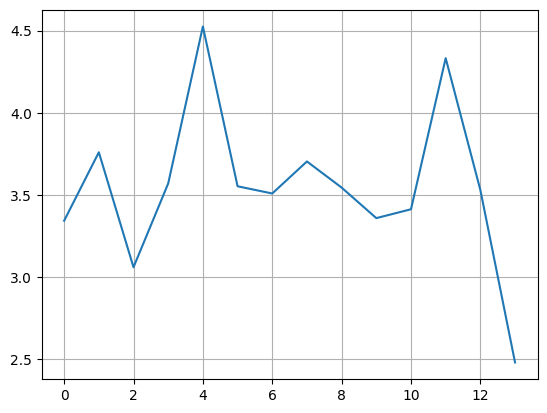

In [3097]:
def conso_by_day(day):
    conso_day = conso_data[conso_data['days']==day]
    conso_jour = len(conso_day)/1000
    return conso_jour
conso_graph=[]
for d in range(7,now.day+1):
    if d<10:pref='0'
    else:pref=''
    day = pref+str(d)+'/03/2024'
    conso_graph.append(conso_by_day(day))
    print(day,conso_by_day(day))
plt.plot(conso_graph)
plt.grid()

In [3098]:
#manuel
#day = '19/03/2024'


In [3099]:

conso_day = conso_data[conso_data['days']==day]
conso_jour = len(conso_day)
conso_jour

2479

In [3100]:
conso_day.head(1).dates, conso_day.tail(1).dates
conso_day['heure']=conso_day['dates'].map(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
conso_day
df= conso_day.set_index('heure')
df

C:\Users\jean\AppData\Local\Temp\ipykernel_21524\1879875640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso_day['heure']=conso_day['dates'].map(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))


,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:22,26515,0.14,26.515,135.772204,1121744447,2024-03-20 00:00:22.152425,20/03/2024
0:0:47,25478,0.14,25.478,141.298375,1121769925,2024-03-20 00:00:47.630425,20/03/2024
0:1:13,26214,0.14,26.214,137.331197,1121796139,2024-03-20 00:01:13.844425,20/03/2024
0:1:40,26962,0.13,26.962,133.521252,1121823101,2024-03-20 00:01:40.806425,20/03/2024
0:2:7,27081,0.13,27.081,132.934530,1121850182,2024-03-20 00:02:07.887425,20/03/2024
...,...,...,...,...,...,...,...
18:2:24,24527,0.15,24.527,146.777021,1186666551,2024-03-20 18:02:24.256425,20/03/2024
18:2:48,24456,0.15,24.456,147.203140,1186691007,2024-03-20 18:02:48.712425,20/03/2024
18:3:14,25365,0.14,25.365,141.927853,1186716372,2024-03-20 18:03:14.077425,20/03/2024


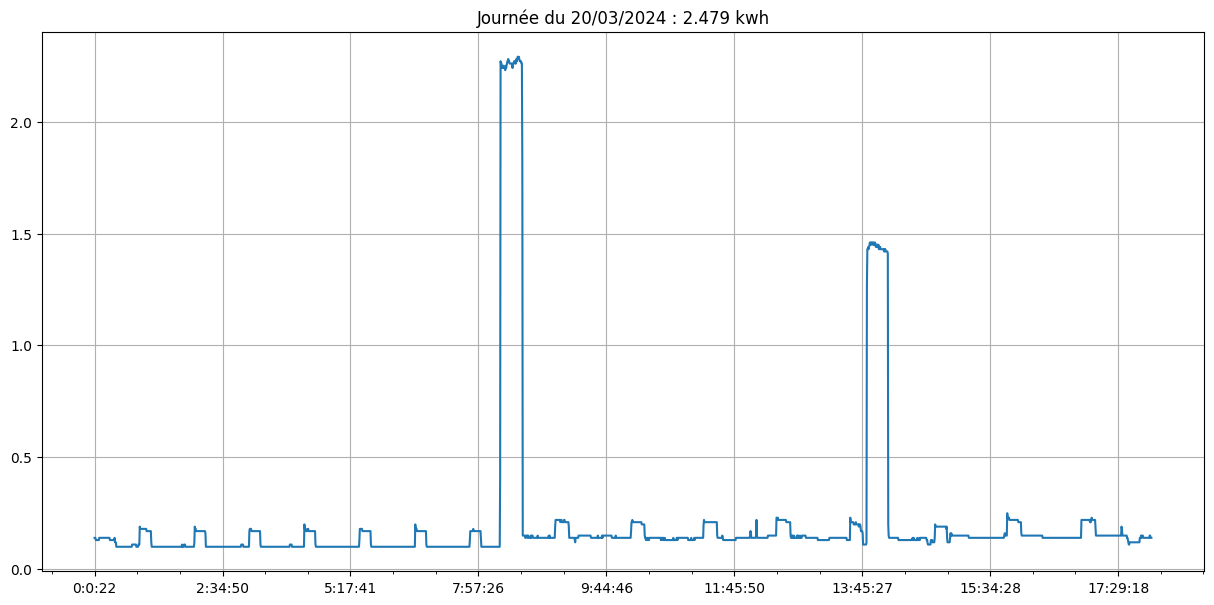

In [3101]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
# consommation d'une journée entière à partir de minuit
fig, ax = plt.subplots()
major_ticks=300;minor_ticks=100
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
# the size of A4 paper
fig.set_size_inches(15, 7)
plt.plot(df['kWh'])
#plt.plot(conso_day['heure'],conso_day['kWh'])
plt.title(f'Journée du {day} : {conso_jour/1000} kwh')
plt.grid()

In [3102]:


time = conso_data['dates']
time


0       2024-03-07 00:25:03.994425
1       2024-03-07 00:25:30.237425
2       2024-03-07 00:25:56.122425
3       2024-03-07 00:26:21.876425
4       2024-03-07 00:26:47.650425
                   ...            
49666   2024-03-20 18:02:24.256425
49667   2024-03-20 18:02:48.712425
49668   2024-03-20 18:03:14.077425
49669   2024-03-20 18:03:38.866425
49670   2024-03-20 18:04:03.871425
Name: dates, Length: 49671, dtype: datetime64[ns]

In [3103]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    #plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

In [3104]:
if not old:
    major_ticks=1/60;minor_ticks=1/240  # plus de ticks, 4 fois plus de minor
    major_ticks=1/30;minor_ticks=1/120   # moins de ticks
    major_ticks=1/15;minor_ticks=1/60
    major_ticks=1/2;minor_ticks=1/8
else:
    major_ticks=4;minor_ticks=1   # encore moins si int


In [3105]:
major_ticks=4;minor_ticks=1
major_ticks,minor_ticks

(4, 1)

## Main graph

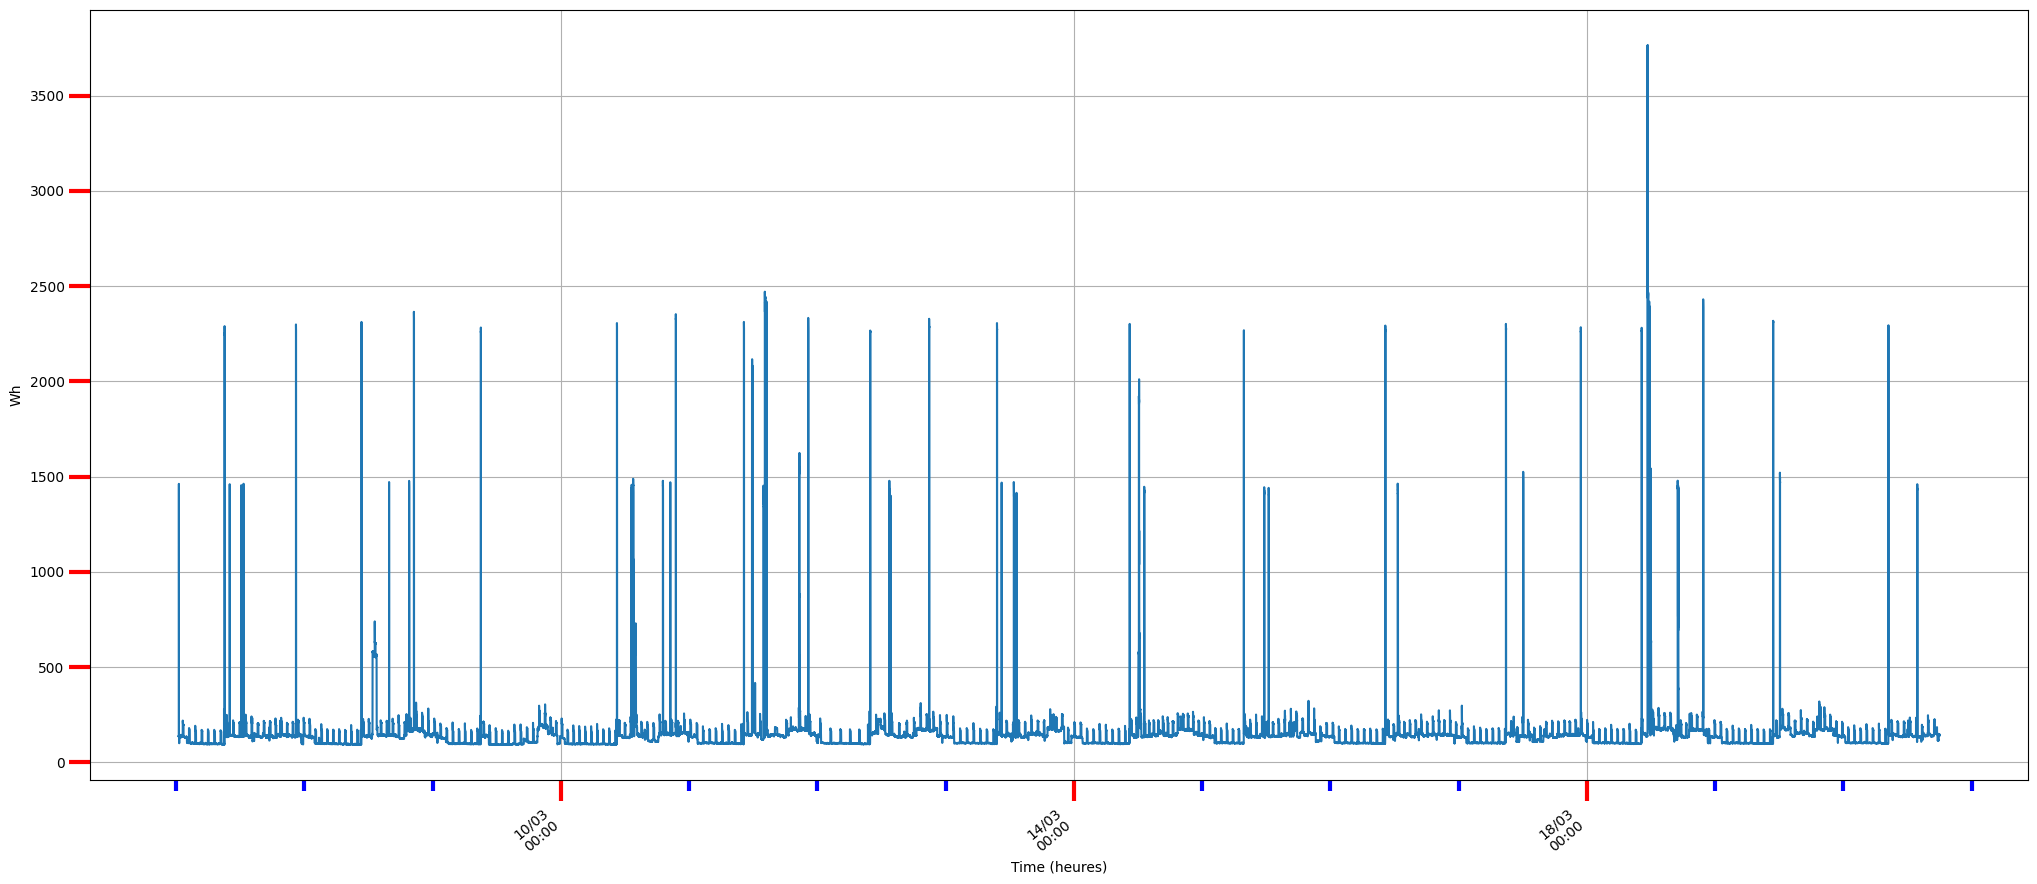

In [3106]:

from matplotlib.dates import (YEARLY, DateFormatter,rrulewrapper, RRuleLocator, drange)

def show_graph():
    fig, ax = plt.subplots()
    # the size of A4 paper
    fig.set_size_inches(25, 10)

    #plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
    
    #formatter = DateFormatter('%d/%m\n%H:%M:%S')
    formatter = DateFormatter('%d/%m\n%H:%M')
    ax.xaxis.set_major_formatter(formatter)

    # ticks sur axe des x
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # minor ticks tous les 5 min
    ax.tick_params(which='both', width=3)
    ax.tick_params(which='major', length=15, color='r')
    ax.tick_params(which='minor', length=8, color='b')

    #plt.plot(conso_data['cumul(ms)']/3600000,conso_data['Wh'])
    plt.plot(time,conso_data['Wh'])
    plt.ylabel('Wh')
    plt.xlabel('Time (heures)')
    #format_date(10)
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')

    #fig.autofmt_xdate()
    
    plt.grid()
    plt.show()
show_graph()

In [3107]:
cumul_conso = len(conso_data)
conso_data.tail(1)

,Interval,kWh,sec,Wh,cumul(ms),dates,days
49670,25005,0.14,25.005,143.971206,1186766166,2024-03-20 18:04:03.871425,20/03/2024


In [3108]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)
cumtime

1186766166000

# Slice of last 1 kWh

In [3109]:
l = len(conso_data)  # total watt consommés
l

49671

In [3110]:
k = 1
taille = k*1000  # fenetre k*1000 watt consommés
l,taille

(49671, 1000)

In [3111]:
if l<1000:
    part = 1
else: part = 1/2
#taille = int(part*l)
taille

1000

In [3112]:
data = conso_data.tail(taille)
len(data),data

(1000,
        Interval   kWh     sec          Wh   cumul(ms)  \
 48671     26879  0.13  26.879  133.933554  1163509312   
 48672     26746  0.13  26.746  134.599566  1163536058   
 48673     26857  0.13  26.857  134.043266  1163562915   
 48674     26702  0.13  26.702  134.821362  1163589617   
 48675     26863  0.13  26.863  134.013327  1163616480   
 ...         ...   ...     ...         ...         ...   
 49666     24527  0.15  24.527  146.777021  1186666551   
 49667     24456  0.15  24.456  147.203140  1186691007   
 49668     25365  0.14  25.365  141.927853  1186716372   
 49669     24789  0.14  24.789  145.225705  1186741161   
 49670     25005  0.14  25.005  143.971206  1186766166   
 
                            dates        days  
 48671 2024-03-20 11:36:27.017425  20/03/2024  
 48672 2024-03-20 11:36:53.763425  20/03/2024  
 48673 2024-03-20 11:37:20.620425  20/03/2024  
 48674 2024-03-20 11:37:47.322425  20/03/2024  
 48675 2024-03-20 11:38:14.185425  20/03/2024  
 ...   

In [3113]:
now = datetime.now()
# conso.csv dynamique
cumtime_start= int(conso_data._get_value(l-taille+1,'cumul(ms)')*1000) # conversion microseconds


In [3114]:
cumtime_end= int(data._get_value(l-1,'cumul(ms)')*1000) # conversion microseconds


In [3115]:
cumtime_end,cumtime_start

(1186766166000, 1163536058000)

In [3116]:
#last_interval = int(data._get_value(l,'Interval')*1000) # conversion microseconds
delta_cumtime = cumtime_end - cumtime_start #+ last_interval
delta_cumtime

23230108000

In [3117]:

base = now - timedelta(microseconds=delta_cumtime)
now,base, data['dates'][l-1].strftime('%d/%m/%Y %H:%M:%S')


(datetime.datetime(2024, 3, 20, 18, 4, 15, 204802),
 datetime.datetime(2024, 3, 20, 11, 37, 5, 96802),
 '20/03/2024 18:04:03')

In [3118]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 00:25:03.994425,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 00:25:30.237425,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 00:25:56.122425,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 00:26:21.876425,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 00:26:47.650425,07/03/2024
...,...,...,...,...,...,...,...
49666,24527,0.15,24.527,146.777021,1186666551,2024-03-20 18:02:24.256425,20/03/2024
49667,24456,0.15,24.456,147.203140,1186691007,2024-03-20 18:02:48.712425,20/03/2024
49668,25365,0.14,25.365,141.927853,1186716372,2024-03-20 18:03:14.077425,20/03/2024
49669,24789,0.14,24.789,145.225705,1186741161,2024-03-20 18:03:38.866425,20/03/2024


In [3119]:
end = conso_data['dates'][l-1].strftime('%d/%m/%Y %H:%M:%S')
start = conso_data['dates'][l-taille+1].strftime('%d/%m/%Y %H:%M:%S')
start,end

('20/03/2024 11:36:53', '20/03/2024 18:04:03')

In [3120]:
data.head(1)['dates'].to_string(index=False),data.tail(1)['dates'].to_string(index=False)

('2024-03-20 11:36:27.017425', '2024-03-20 18:04:03.871425')

In [3121]:
k

1

In [3122]:
data.Interval.tail(1000)

48671    26879
48672    26746
48673    26857
48674    26702
48675    26863
         ...  
49666    24527
49667    24456
49668    25365
49669    24789
49670    25005
Name: Interval, Length: 1000, dtype: int64

In [3123]:
conversion_us_heure = 1/1000/60/60 
temps_1kWh = sum(data.Interval.tail(1000))*conversion_us_heure  #somme 1000 interval = temps conso 1 kWh
conso_jour = 24/temps_1kWh
heure = int(temps_1kWh)
mn = (temps_1kWh - heure)*60
sec = (mn - int(mn))*60
temps_1kWh, conso_jour,heure,int(mn),int(sec)

(6.467703611111112, 3.710745179907362, 6, 28, 3)

In [3124]:
data['heure']=conso_data['dates']#.strftime('%d/%m/%Y %H:%M:%S')

C:\Users\jean\AppData\Local\Temp\ipykernel_21524\3458501435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['heure']=conso_data['dates']#.strftime('%d/%m/%Y %H:%M:%S')


In [3125]:
data

,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
48671,26879,0.13,26.879,133.933554,1163509312,2024-03-20 11:36:27.017425,20/03/2024,2024-03-20 11:36:27.017425
48672,26746,0.13,26.746,134.599566,1163536058,2024-03-20 11:36:53.763425,20/03/2024,2024-03-20 11:36:53.763425
48673,26857,0.13,26.857,134.043266,1163562915,2024-03-20 11:37:20.620425,20/03/2024,2024-03-20 11:37:20.620425
48674,26702,0.13,26.702,134.821362,1163589617,2024-03-20 11:37:47.322425,20/03/2024,2024-03-20 11:37:47.322425
48675,26863,0.13,26.863,134.013327,1163616480,2024-03-20 11:38:14.185425,20/03/2024,2024-03-20 11:38:14.185425
...,...,...,...,...,...,...,...,...
49666,24527,0.15,24.527,146.777021,1186666551,2024-03-20 18:02:24.256425,20/03/2024,2024-03-20 18:02:24.256425
49667,24456,0.15,24.456,147.203140,1186691007,2024-03-20 18:02:48.712425,20/03/2024,2024-03-20 18:02:48.712425
49668,25365,0.14,25.365,141.927853,1186716372,2024-03-20 18:03:14.077425,20/03/2024,2024-03-20 18:03:14.077425
49669,24789,0.14,24.789,145.225705,1186741161,2024-03-20 18:03:38.866425,20/03/2024,2024-03-20 18:03:38.866425


<Axes: >

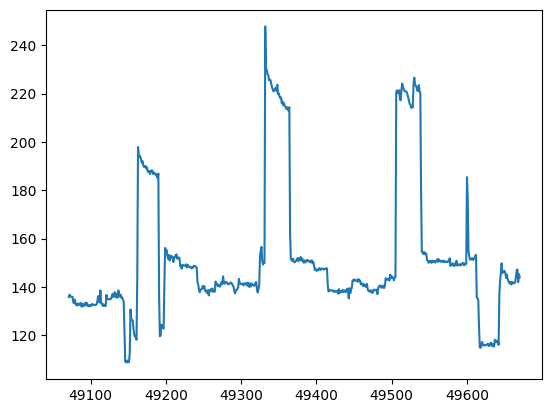

In [3126]:
data.tail(600)['Wh'].plot()

In [3127]:
data['Wh']

48671    133.933554
48672    134.599566
48673    134.043266
48674    134.821362
48675    134.013327
            ...    
49666    146.777021
49667    147.203140
49668    141.927853
49669    145.225705
49670    143.971206
Name: Wh, Length: 1000, dtype: float64

# k kW window graph

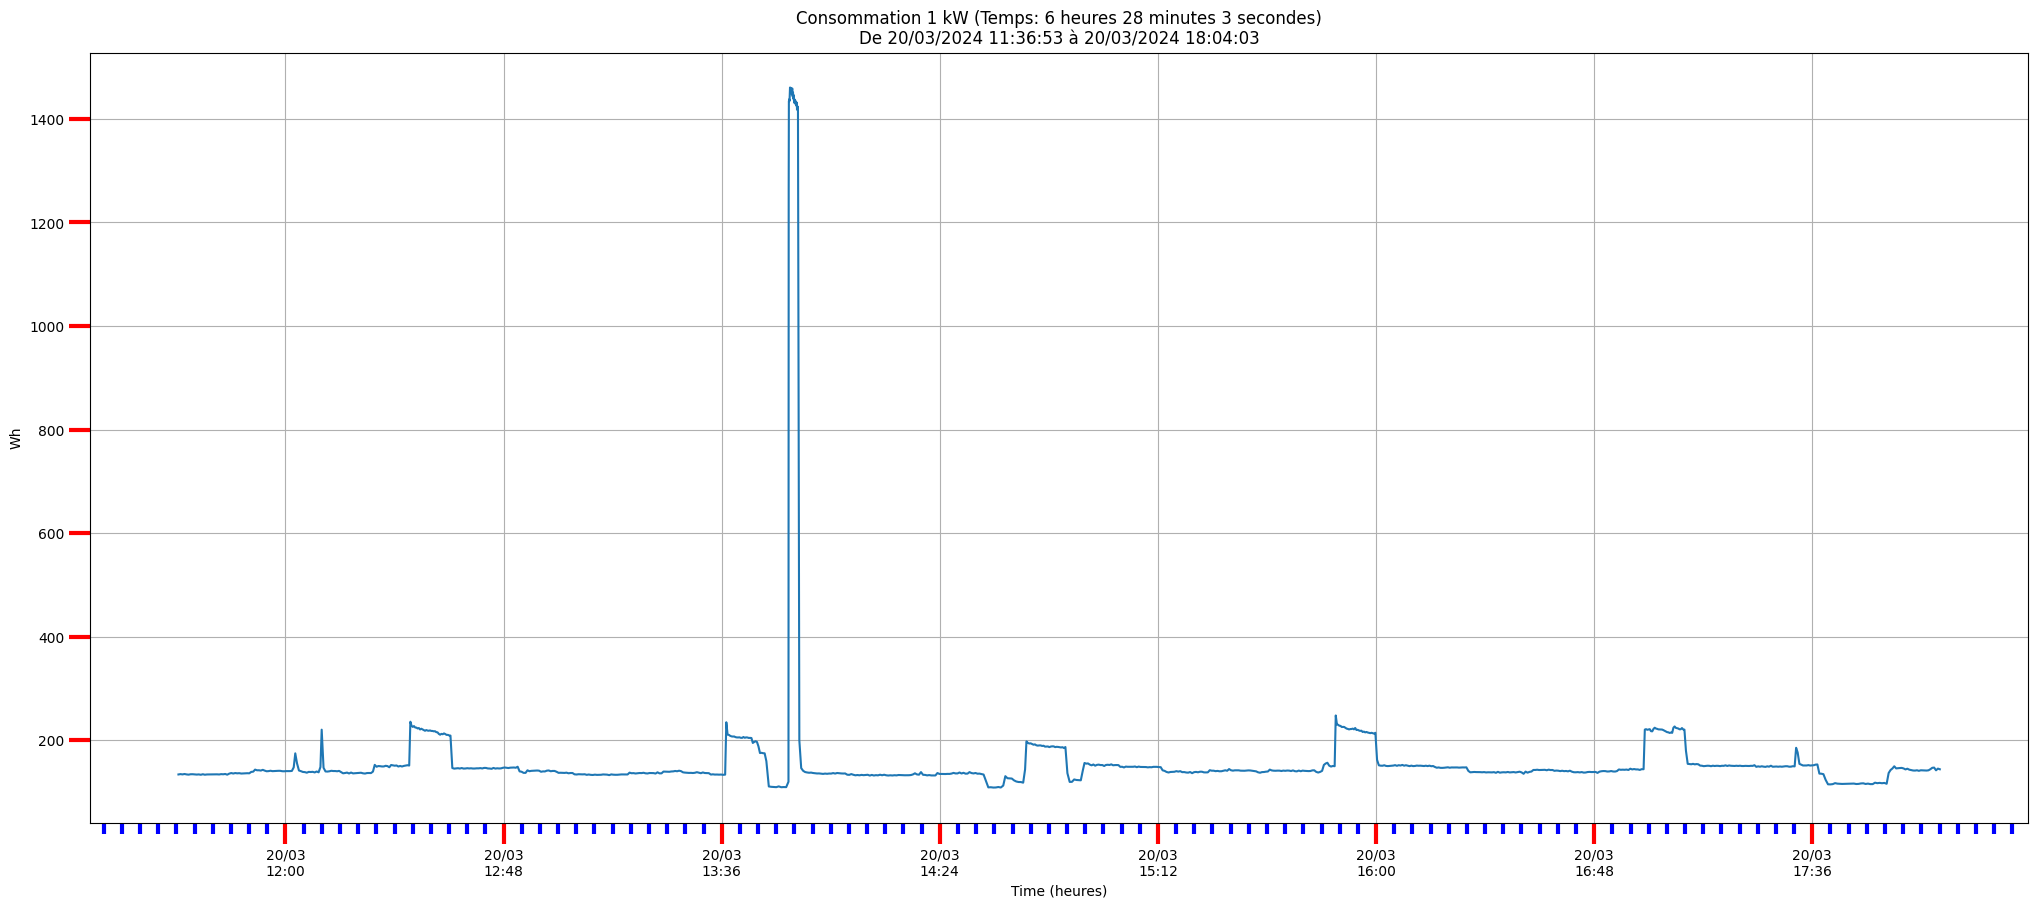

In [3128]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(25, 10)

formatter = DateFormatter('%d/%m\n%H:%M')
ax.xaxis.set_major_formatter(formatter)

# ticks sur axe des x
major_ticks=1/30;minor_ticks=1/360
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # 1 major tick tous les 48 min
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # 1 minor ticks tous les 4 min
ax.tick_params(which='both', width=3)
ax.tick_params(which='major', length=15, color='r')
ax.tick_params(which='minor', length=8, color='b')

plt.title(f'Consommation {k} kW (Temps: {heure} heures {int(mn)} minutes {int(sec)} secondes)\nDe {start} à {end}')
plt.plot(data['dates'],data['Wh'])
plt.ylabel('Wh')
plt.xlabel('Time (heures)')
plt.grid()


<Axes: ylabel='Frequency'>

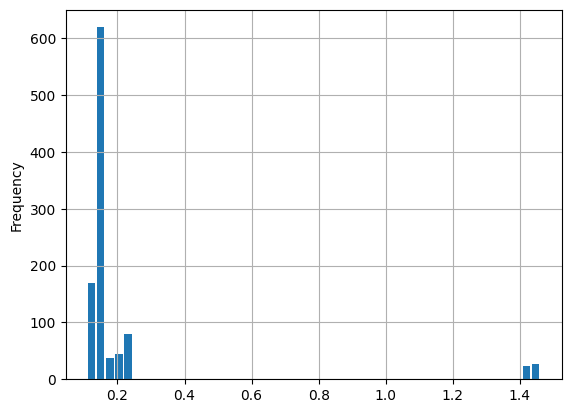

In [3129]:
data.kWh.plot.hist(bins=50,rwidth=0.8,grid=True)


In [3130]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms),dates,days
49666,24527,0.15,24.527,146.777021,1186666551,2024-03-20 18:02:24.256425,20/03/2024
49667,24456,0.15,24.456,147.203140,1186691007,2024-03-20 18:02:48.712425,20/03/2024
49668,25365,0.14,25.365,141.927853,1186716372,2024-03-20 18:03:14.077425,20/03/2024
49669,24789,0.14,24.789,145.225705,1186741161,2024-03-20 18:03:38.866425,20/03/2024
49670,25005,0.14,25.005,143.971206,1186766166,2024-03-20 18:04:03.871425,20/03/2024


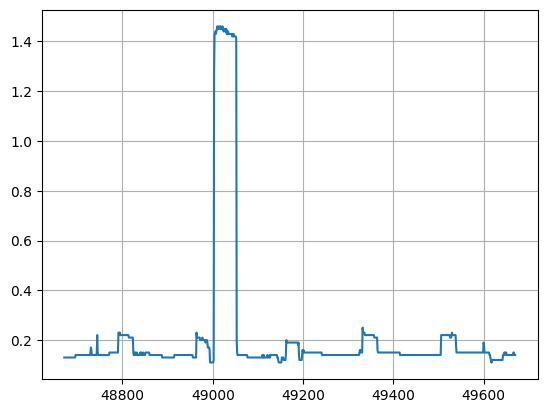

In [3131]:
conso_data.tail(1000)['kWh'].plot()
plt.grid()

In [3132]:
#plt.plot(conso_data['sec'])
now = dt.datetime.now()
last_cumul = np.array(conso_data['cumul(ms)'].tail(1))[0]*1000.0  # us
last_cumul, last_cumul/60e6  # min

(1186766166000.0, 19779.4361)

In [3133]:
begin = now - dt.timedelta(microseconds=last_cumul)  #2023, 6, 24, 9, 14, (39, 942895) approximatif
now, begin

(datetime.datetime(2024, 3, 20, 18, 4, 18, 957920),
 datetime.datetime(2024, 3, 7, 0, 24, 52, 791920))

In [3134]:
x = mdates.drange(begin,now,dt.timedelta(microseconds=1000000))  # seconds
len(conso_data),len(x),len(x)/3600

(49671, 1186767, 329.6575)

In [3135]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

In [3136]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
base = dt.datetime(2005, 2, 1)
dates = [base + dt.timedelta(hours=(2 * i)) for i in range(732)]
N = len(dates)
N


732

In [3137]:
732/12 # 60 jours

61.0

In [3138]:
dates[0],dates[-1]

(datetime.datetime(2005, 2, 1, 0, 0), datetime.datetime(2005, 4, 2, 22, 0))

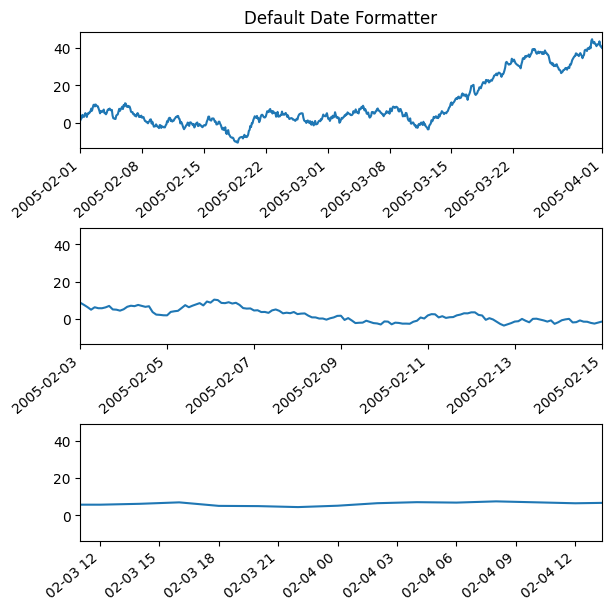

In [3139]:
np.random.seed(19680801)
y = np.cumsum(np.random.randn(N))

fig, axs = plt.subplots(3, 1, layout='constrained', figsize=(6, 6))
lims = [(np.datetime64('2005-02'), np.datetime64('2005-04')),
        (np.datetime64('2005-02-03'), np.datetime64('2005-02-15')),
        (np.datetime64('2005-02-03 11:00'), np.datetime64('2005-02-04 13:20'))]
for nn, ax in enumerate(axs):
    ax.plot(dates, y)
    ax.set_xlim(lims[nn])
    # rotate_labels...
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')
axs[0].set_title('Default Date Formatter')
plt.show()

In [3140]:
t = dt.datetime(2005, 4, 2, 22, 0)
t

datetime.datetime(2005, 4, 2, 22, 0)